<a href="https://colab.research.google.com/github/Bazinga97/ML_Projects/blob/main/DL_11_Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv ('Practice_DL_11_customer churn prediction.csv')

In [ ]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True) ## inplace true : changes becomes permanent

In [ ]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
pd.get_dummies(df,columns = ['Geography', 'Gender'], drop_first=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape

(8000, 10)

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'Spain' is a categorical feature, encode it using one-hot encoding
#X_train_encoded = pd.get_dummies(X_train)
#X_test_encoded = pd.get_dummies(X_test)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


In [ ]:
X_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.57369368,
         1.09168714, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ..., -0.57369368,
         1.09168714, -1.09168714]])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
import tensorflow as tf

# Define your model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model directly without using tf.function
history = model.fit(X_train_scaled_subset, y_train, batch_size=50, epochs=100, verbose=1, validation_split=0.2)


Epoch 1/100
128/128 [==============================] - 2s 8ms/step - loss: 0.4637 - accuracy: 0.8025 - val_loss: 0.4274 - val_accuracy: 0.8225
Epoch 2/100
128/128 [==============================] - 1s 5ms/step - loss: 0.4030 - accuracy: 0.8306 - val_loss: 0.4092 - val_accuracy: 0.8338
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 0.3787 - accuracy: 0.8489 - val_loss: 0.3843 - val_accuracy: 0.8369
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 0.3610 - accuracy: 0.8534 - val_loss: 0.3743 - val_accuracy: 0.8487
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 0.3517 - accuracy: 0.8558 - val_loss: 0.3667 - val_accuracy: 0.8550
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: 0.3450 - accuracy: 0.8577 - val_loss: 0.3742 - val_accuracy: 0.8481
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 0.3427 - accuracy: 0.8592 - val_loss: 0.3603 - val_accuracy: 0.8531

In [ ]:
model.layers[1].get_weights()

[array([[ 0.36640385,  0.12439063,  0.05042065, ..., -0.1390586 ,
         -0.20981541,  0.09002183],
        [ 0.30960009,  0.06336389,  0.04510505, ..., -0.03041499,
          0.20804612, -0.11874643],
        [ 0.14945713,  0.7178554 ,  0.19954962, ...,  0.13365862,
          0.01898211, -0.49489802],
        ...,
        [-0.3988058 , -0.0605091 , -0.26734883, ..., -0.06882944,
         -0.26852003, -0.02818625],
        [-0.00449342, -0.78128505,  0.11256577, ..., -0.493316  ,
         -0.14745292,  0.10102198],
        [-0.29558298,  0.2382505 ,  0.31669205, ...,  0.02536059,
         -0.05380267,  0.12505028]], dtype=float32),
 array([ 0.02664202, -0.13639396,  0.01056439,  0.07509546,  0.02777421,
         0.07902106, -0.10671892, -0.04702276,  0.1133918 ,  0.07190882,
         0.03901515,  0.08657567,  0.04591607,  0.13433504,  0.05490857,
         0.04196915, -0.05589835, -0.05399411,  0.02196407,  0.14385168,
         0.01138878, -0.05517486, -0.0208223 ,  0.13290836,  0.046

In [ ]:
# Assuming X_test_scaled has 13 features and you want to use only the first 11 features
X_test_scaled_subset = X_test_scaled[:, :11]

# Now, you can use X_test_scaled_subset for prediction
y_pred = model.predict(X_test_scaled_subset)


63/63 [==============================] - 0s 5ms/step


In [ ]:
y_pred

array([[0.08350934],
       [0.12269244],
       [0.06484615],
       ...,
       [0.05751374],
       [0.3980514 ],
       [0.14159493]], dtype=float32)

In [ ]:
y_pred = y_pred.argmax(axis=-1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

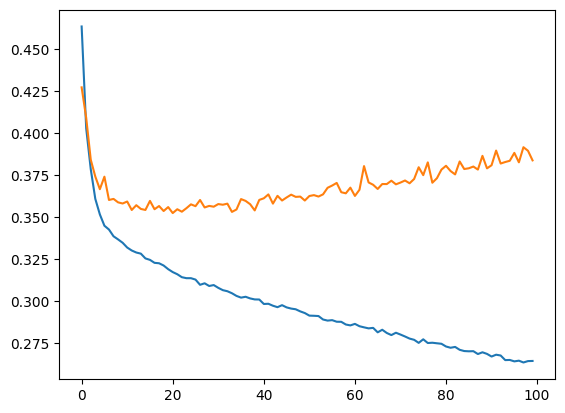

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])